In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from textblob import TextBlob
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-sales/Vehicale_car_sales.csv


# Data Collection:

In [4]:
# Import data from kaggle csv file
car_sales = pd.read_csv('/kaggle/input/car-sales/Vehicale_car_sales.csv')

# Glance the dataset:

In [5]:
# See top 5 rows
car_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [6]:
# And 5 bottom rows
car_sales.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [7]:
car_sales.shape

(558837, 16)

In [8]:
car_sales.describe

<bound method NDFrame.describe of         year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16

In [9]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [10]:
# Count null value in each columns
car_sales.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

# Data cleansing:

In [11]:
car_sales.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [12]:
# Check how much percent missing value from the dataset

car_sales.isnull().mean().round(2) * 100

year             0.0
make             2.0
model            2.0
trim             2.0
body             2.0
transmission    12.0
vin              0.0
state            0.0
condition        2.0
odometer         0.0
color            0.0
interior         0.0
seller           0.0
mmr              0.0
sellingprice     0.0
saledate         0.0
dtype: float64

### As you can see, there is a 12% missing value in the 'transmission' column, which exceeds the 10% threshold. Cleasing or transformation is necessary

In [13]:
# Remove unncessary column
cleaned_cs = car_sales.drop(['vin'], axis=1)

In [14]:
# Count unique value in the transmission column
car_sales['transmission'].value_counts(dropna=False)

transmission
automatic    475915
NaN           65352
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

#### Calculate ratio between 'manual' and 'automatic in the transmission column

In [15]:
# Convert all values in 'transmission' column to lowercase
cleaned_cs['transmission'] = cleaned_cs['transmission'].str.lower()

# Replace 'sedan' with np.nan (actual NaN value)
cleaned_cs['transmission'] = cleaned_cs['transmission'].replace('sedan', np.nan)

# Count the occurrences of each value in the 'transmission' column
transmission_counts = cleaned_cs['transmission'].value_counts(dropna=False)

print(transmission_counts)


transmission
automatic    475915
NaN           65378
manual        17544
Name: count, dtype: int64


#### Calculate percentage between 'manual' and 'automatic' in the transmission column in order to replace with 'NaN' with the same percentage(uncleaned version)

In [16]:
# Find ratio transmission and automatic
manual =  cleaned_cs['transmission'].value_counts().get('manual', 0)

auto = cleaned_cs['transmission'].value_counts().get('automatic', 0)

total_m_and_a = cleaned_cs['transmission'].value_counts().get('manual', 0) + cleaned_cs['transmission'].value_counts().get('automatic', 0)

total_ms = cleaned_cs['transmission'].isna().sum()

# Calculate percentage between automatic and manual then round up
m2allms_percent = manual / total_m_and_a * 100

a2allms_percent  = auto / total_m_and_a * 100

# Calculate how many rows it have to be replaced with 'NaN' in the column
m2allms = m2allms_percent * total_ms / 100

a2allms  =  a2allms_percent * total_ms / 100

print('total missing value: ', total_ms, 'rows')
print('manual to all_ms percentage: ',m2allms_percent, '%')
print('auto to all_ms percentage: ',a2allms_percent, '%')
print('count rows to fill missing value with manual: ',m2allms.round())
print('count rows to fill missing value with auto: ',a2allms.round())

total missing value:  65378 rows
manual to all_ms percentage:  3.5553105729148724 %
auto to all_ms percentage:  96.44468942708512 %
count rows to fill missing value with manual:  2324.0
count rows to fill missing value with auto:  63054.0


In [17]:
cleaned_cs['transmission'].value_counts(dropna=False)

transmission
automatic    475915
NaN           65378
manual        17544
Name: count, dtype: int64

In [18]:
# Replace NaN with 'automatic' for 63054 rows
auto_indices = cleaned_cs[cleaned_cs['transmission'].isnull()].sample(n=63054).index
cleaned_cs.loc[auto_indices, 'transmission'] = 'automatic'

# Replace NaN with 'manual' for 2412 rows
manual_indices = cleaned_cs[cleaned_cs['transmission'].isnull()].sample(n=2324).index
cleaned_cs.loc[manual_indices, 'transmission'] = 'manual'

In [19]:
# Check value count percentage After cleansing (it needs to be the same befor cleansing)
value_counts = cleaned_cs['transmission'].value_counts(dropna=False)

# Calculate the total count
total_count = value_counts.sum()

# Calculate the percentage of each value
value_counts_percentage = (value_counts / total_count * 100).round(2)
print('percentage: ', value_counts_percentage)


percentage:  transmission
automatic    96.44
manual        3.56
Name: count, dtype: float64


In [20]:
# Verify the column is clear
cleaned_cs['transmission'].value_counts(dropna= False)

transmission
automatic    538969
manual        19868
Name: count, dtype: int64

In [21]:
# Cout value in the 'Year' column and see if there is 'NaN' 
cleaned_cs['year'].value_counts(dropna=False).sort_index()

year
1982         2
1983         1
1984         5
1985        10
1986        11
1987         8
1988        11
1989        20
1990        49
1991        67
1992       132
1993       205
1994       392
1995       711
1996       851
1997      1546
1998      2149
1999      3363
2000      5227
2001      6468
2002      9715
2003     13281
2004     17342
2005     21394
2006     26913
2007     30845
2008     31502
2009     20594
2010     26485
2011     48548
2012    102315
2013     98168
2014     81070
2015      9437
Name: count, dtype: int64

In [22]:
# Cout value in the 'make' column and see if there is 'NaN' or incorrect name
cleaned_cs['make'].value_counts(dropna=False).sort_index(ascending=False)

make
vw                 24
volkswagen         24
toyota             95
suzuki              5
subaru             60
                ...  
BMW             20719
Audi             5869
Aston Martin       25
Acura            5901
NaN             10301
Name: count, Length: 97, dtype: int64

In [23]:
# The missing value do not reach 5 percent of all rows, so droping null value is needed
percent = cleaned_cs['make'].isnull().sum() / cleaned_cs.shape[0] * 100

round_percent = percent.round(2)

print("Missing value percentage in the 'make'column: ",round_percent, "%")

Missing value percentage in the 'make'column:  1.84 %


In [24]:
# Drop null valve in the column
cleaned_cs = cleaned_cs.dropna(subset=['make'])

In [25]:
# Recheck null value is already removed
cleaned_cs['make'].value_counts(dropna=False).sort_index(ascending=False)

make
vw                 24
volkswagen         24
toyota             95
suzuki              5
subaru             60
                ...  
Bentley           116
BMW             20719
Audi             5869
Aston Martin       25
Acura            5901
Name: count, Length: 96, dtype: int64

### I do not have knowledge about car brand name. so, I ask Chatgpt for help which one is not a car brand name.

This is my personal helper's answer: The item 'dot' is not a car brand name. It might refer to the Department of Transportation (DOT) or another entity, as it is not a commonly known car brand.

In [26]:
# It is needed to rearrange the unique value in the column in order to easily transform the data
un_value_make = cleaned_cs['make'].unique()

un_valve_make_sort = sorted(un_value_make)

print(un_valve_make_sort)

['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream', 'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk', 'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk', 'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercury', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'smart', 'subaru', 'suzuki', 'toyota', 'vo

In [27]:
# Remove 'dot' in the column
cleaned_cs = cleaned_cs[cleaned_cs['make'] != 'dot'].copy()

# List car brand name to be replaced
name_replace_list = {'dodge tk':'dodge','ford tk':'ford','ford truck':'ford','gmc truck':'gmc','hyundai tk': 'hyundai','mazda tk':'mazda', 'mercedes-b':'mercedes-benz', 'mercedes':'mercedes-benz','vw':'volkswagen','chev truck':'chevrolet'}

# Replace the value
cleaned_cs.loc[:, 'make'] = cleaned_cs['make'].replace(name_replace_list)


In [28]:
# Lower the case
cleaned_cs.loc[:, 'make'] = cleaned_cs['make'].str.lower()
cleaned_cs['make'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'saab',
       'suzuki', 'oldsmobile', 'isuzu', 'geo', 'rolls-royce', 'daewoo',
       'plymouth', 'tesla', 'airstream', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [29]:
# Make sure the data is already cleansed
done = cleaned_cs['make'].sort_values().unique()

done

array(['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw',
       'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge',
       'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda',
       'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln',
       'lotus', 'maserati', 'mazda', 'mercedes-benz', 'mercury', 'mini',
       'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac',
       'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion',
       'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

In [30]:
# Count null value in the 'model' column
cleaned_cs['model'].isnull().sum()

98

In [31]:
# Remove null value
cleaned_cs = cleaned_cs.dropna(subset=['model'])

# Lower character
cleaned_cs['model'] = cleaned_cs['model'].str.lower()

In [32]:
# See unique value in the 'model' column
cleaned_cs['model'].value_counts().sort_values()

model
458 italia        1
swift             1
323i              1
cabriolet         1
b-series          1
              ...  
escape        11893
camry         12549
fusion        12946
f-150         14479
altima        19349
Name: count, Length: 851, dtype: int64

In [33]:
# Count unique value in the 'model' column
cleaned_cs['trim'].nunique()

1962

In [34]:
# Count missing value in the 'model' column
cleaned_cs['trim'].isnull().sum()

349

In [35]:
# Remove null value 
cleaned_cs = cleaned_cs.dropna(subset=['trim'])

In [36]:
# Count null value after removing
cleaned_cs['trim'].isnull().sum()

0

# Body column

In [37]:
cleaned_cs['body'].value_counts()

body
Sedan          199364
SUV            119292
sedan           41881
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

In [38]:
cleaned_cs['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [39]:
# Count null value in the 'model' column
cleaned_cs['body'].isnull().sum()

2544

In [40]:
# Remove null value
cleaned_cs = cleaned_cs.dropna(subset=['body'])

# Lower character
cleaned_cs.loc[:, 'body'] = cleaned_cs['body'].str.lower()


In [41]:
cleaned_cs['body'].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van',
       'navitgation', 'regular-cab'], dtype=object)

In [42]:
cleaned_cs['state'].value_counts()

state
fl                   81150
ca                   71131
pa                   53054
tx                   44955
ga                   33885
                     ...  
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj2fm258506        1
3vwd17aj4fm201708        1
3vwd17aj2fm261566        1
Name: count, Length: 64, dtype: int64

<iframe src="https://www.kaggle.com/embed/cardata/heart-disease-data-analysis?cellIds=5&kernelSessionId=176686080" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="HEART DISEASE DATA ANALYSIS"></iframe>

In [43]:
cleaned_cs['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nv',
       'oh', 'mi', 'nj', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

In [44]:
state_remove_list = ['3vwd17aj4fm201708','3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
                       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
        '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566']

In [45]:
cleaned_cs = cleaned_cs[~cleaned_cs['state'].isin(state_remove_list)]


In [46]:
cleaned_cs['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nv',
       'oh', 'mi', 'nj', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

# Condition col

In [47]:
cleaned_cs['condition'].unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., nan, 49., 17.,
       19., 29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46.,
       36., 35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12.,
       14., 11., 13.])

In [48]:
cleaned_cs['condition'].value_counts(dropna=False)

condition
19.0    40426
35.0    26206
37.0    25507
44.0    25222
43.0    24695
42.0    24066
41.0    22771
36.0    22752
39.0    19665
4.0     19633
2.0     19623
28.0    18648
29.0    18424
38.0    18413
34.0    17022
27.0    15797
49.0    12904
48.0    12570
46.0    12499
45.0    12174
25.0    12146
26.0    11557
47.0    11236
NaN     11200
5.0     11048
3.0     10477
33.0    10372
32.0     9727
24.0     9037
31.0     9016
21.0     8827
23.0     7892
1.0      6911
22.0     5831
18.0      312
17.0      224
16.0      169
15.0      133
14.0      127
12.0       94
11.0       86
13.0       79
Name: count, dtype: int64

In [49]:
cleaned_cs = cleaned_cs.dropna()

In [50]:
cleaned_cs['condition'].isnull().sum()

0

In [51]:
cleaned_cs['color'].value_counts()

color
black        106599
white        101834
gray          80001
silver        79514
blue          48532
red           41635
—             24371
gold          10471
green         10361
beige          8591
burgundy       8501
brown          6493
orange         1940
purple         1477
off-white      1398
yellow         1196
charcoal        464
turquoise       215
pink             41
lime             14
Name: count, dtype: int64

In [52]:
cleaned_cs['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [53]:
cleaned_cs['color'] = cleaned_cs['color'].str.replace('—', '').replace('', np.NaN)


In [54]:
# fill null value with most frequent value 
col_to_impute = cleaned_cs['color']

imputer = SimpleImputer(strategy='most_frequent')

imputed_col = imputer.fit_transform(col_to_impute.values.reshape(-1, 1)).flatten()

cleaned_cs['color'] = imputed_col


In [55]:
cleaned_cs['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [56]:
cleaned_cs['color'].isnull().sum()

0

In [57]:
cleaned_cs['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [58]:
cleaned_cs['color'].value_counts()

color
black        130970
white        101834
gray          80001
silver        79514
blue          48532
red           41635
gold          10471
green         10361
beige          8591
burgundy       8501
brown          6493
orange         1940
purple         1477
off-white      1398
yellow         1196
charcoal        464
turquoise       215
pink             41
lime             14
Name: count, dtype: int64

cleaned_cs

In [59]:
cleaned_cs.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,s60,T5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Interior Col
# 

In [60]:
cleaned_cs['interior'].isnull().sum()

0

In [61]:
cleaned_cs['interior'].unique()

array(['black', 'beige', 'tan', 'brown', 'gray', '—', 'burgundy', 'white',
       'silver', 'off-white', 'red', 'yellow', 'green', 'purple', 'blue',
       'orange', 'gold'], dtype=object)

In [62]:
cleaned_cs['interior'].value_counts()

interior
black        238663
gray         170422
beige         57868
tan           41703
—             11425
brown          8296
red            1298
silver         1053
blue           1013
off-white       469
purple          326
gold            313
white           239
green           223
burgundy        184
orange          134
yellow           19
Name: count, dtype: int64

In [63]:
cleaned_cs['interior'] = cleaned_cs['interior'].replace('—', np.nan).copy()

In [64]:
cleaned_cs['interior'].value_counts(dropna=False)

interior
black        238663
gray         170422
beige         57868
tan           41703
NaN           11425
brown          8296
red            1298
silver         1053
blue           1013
off-white       469
purple          326
gold            313
white           239
green           223
burgundy        184
orange          134
yellow           19
Name: count, dtype: int64

In [65]:
cleaned_cs['interior'] = cleaned_cs['interior'].ffill()

In [66]:
cleaned_cs['interior'].value_counts(dropna=False)

interior
black        243647
gray         174204
beige         59206
tan           42651
brown          8507
red            1337
silver         1071
blue           1057
off-white       496
purple          336
gold            318
white           243
green           231
burgundy        188
orange          137
yellow           19
Name: count, dtype: int64

# Odometer Col


In [67]:
# Assuming 'cleaned_cs' is your DataFrame and 'odometer' is the column with mixed values
non_numeric_count = cleaned_cs['odometer'].apply(lambda x: not str(x).replace('.', '', 1).isdigit()).sum()

print("Number of non-numeric values in 'odometer':", non_numeric_count)


Number of non-numeric values in 'odometer': 0


In [68]:
# Assuming 'cleaned_cs' is your DataFrame and 'odometer' is the column with mixed values
numeric_count = cleaned_cs['odometer'].apply(lambda x: str(x).replace('.', '', 1).isdigit()).sum()

print("Number of numerical values in 'odometer':", numeric_count)


Number of numerical values in 'odometer': 533648


# Seller col

In [69]:
cleaned_cs['seller'].isna().sum()

0

In [70]:
cleaned_cs['seller'].value_counts().sort_index()

seller
1 cochran of monroeville    234
101motors                     1
1360250 alberta ltd           1
1360250 alberta ltd.          1
1428879 alberta ltd           1
                           ... 
zmax moto leasing inc         5
zoom auto                     1
zuma autoboat                 1
zumbrota ford sales llc       1
zygi auto corp                1
Name: count, Length: 12735, dtype: int64

In [71]:
# Calculate median
mmr_median = cleaned_cs['mmr'].median()

# Calculate mode
mmr_mode = cleaned_cs['mmr'].mode()

# Calculate mean
avg = cleaned_cs['mmr'].mean()

print("Median:", mmr_median)
print("Mode:", mmr_mode)
print("Mean:", avg)

Median: 12500.0
Mode: 0    12500.0
Name: mmr, dtype: float64
Mean: 14013.458824918298


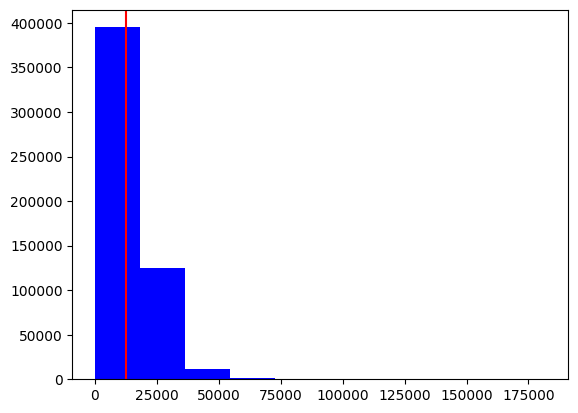

In [72]:
# Plot histogram of 'mmr'
plt.hist(cleaned_cs['mmr'], color='blue')

# Calculate median of 'mmr'
mmr_median = cleaned_cs['mmr'].median()

# Median Line
plt.axvline(x=mmr_median, color='red')

<Axes: >

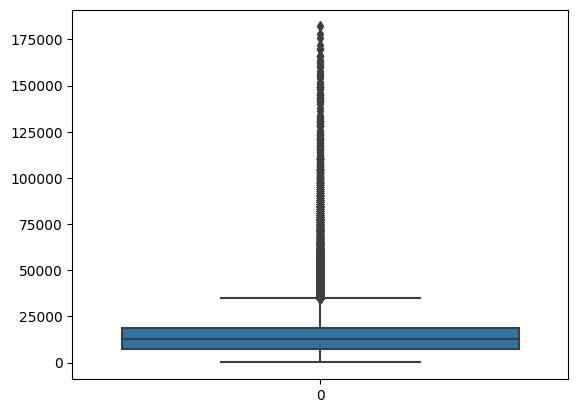

In [73]:
# Plot box to see outliner
sns.boxplot(cleaned_cs['mmr'])

In [74]:
outlier = cleaned_cs[~cleaned_cs['mmr'].isin(cleaned_cs[cleaned_cs['mmr'] <= 50000]['mmr'])]

In [79]:
outlier.groupby('make').count()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
make,,,,,,,,,,,,,,
aston martin,14,14,14,14,14,14,14,14,14,14,14,14,14,14
audi,139,139,139,139,139,139,139,139,139,139,139,139,139,139
bentley,92,92,92,92,92,92,92,92,92,92,92,92,92,92
bmw,613,613,613,613,613,613,613,613,613,613,613,613,613,613
cadillac,61,61,61,61,61,61,61,61,61,61,61,61,61,61
chevrolet,325,325,325,325,325,325,325,325,325,325,325,325,325,325
dodge,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ferrari,19,19,19,19,19,19,19,19,19,19,19,19,19,19
fisker,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
#

# Selling Price col

In [85]:
cleaned_cs['sellingprice'].isnull().sum()

0

# salesdate Col

In [90]:
cleaned_cs.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [91]:
cleaned_cs['saledate'].head()

0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2    Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3    Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4    Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
Name: saledate, dtype: object

In [ ]:
# Convert to datetime
date = pd.to_datetime(date_string, format='%a %b %d %Y %H:%M:%S GMT%z (%Z)')
clenead_cs['saledate'] = pd.to_datetime()